# INCOME LEVEL CLASSIFICATION

In [1]:
#import neccesary libraries for data preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
data=pd.read_csv(r'D:\ML DATA\MAchine learning data\Us income census\225_498_bundle_archive\adult.csv')
data.head() #checks first five rows

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [105]:
data.shape

(32561, 15)

In [106]:
#checking for missing values
data.isnull().sum() 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

THERE ARE NO MISSING VALUES IN THIS DATASET

In [107]:
#check the statistics of the numerical data
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


IT SEEMS SOME OF THE FEATURES NEED TO BE INVESTIGATED MORE SINCE THEY HAVE WEIRD VALUES

In [108]:
cols_to_check=['fnlwgt','capital.gain','capital.loss'] #the columns to be checked 

In [109]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

THE INCOME(TARGET) FEATURE IS IMBALANCED AND WOULD BE WORKED ON LATER

In [110]:
#from imblearn.over_sampling import RandomOverSampler

In [111]:
#sampler=RandomOverSampler(random_state=0)
#data['income']=sampler.fit_transform(

# ANALYZING THE CATEGORICAL DATASETS

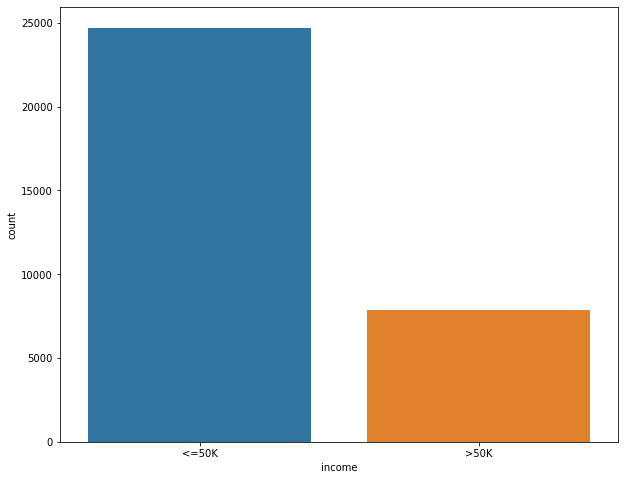

In [112]:

plt.figure(figsize=(10,8))
sns.countplot(data['income'])

In [113]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

THERE IS A TYPE OF WORKCLASS KNOWN AS ? WHICH DOESNT SEEM RIGHT SO NEEDS TO CHANGED

In [114]:
#the '?' changed to undefined 
data['workclass'][data['workclass']=='?']='undefined'

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

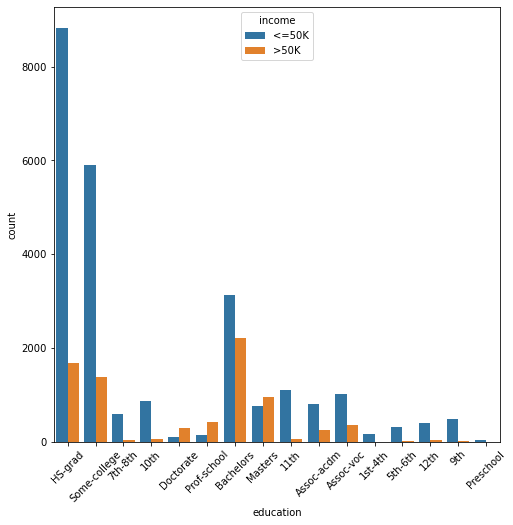

In [116]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['education'], hue=data['income'])
plt.xticks(rotation=45);

THIS FEATURE FOLLOWS THE SAME TREND THAT SINCE MOST PEOPLE HAVE INCOME <=50k SO THE LEVEL OF EDUCATION MATCHES THAT TREND, EXCEPT THE DOCTORATE, PROF SCHOOL AND MASTERS WHICH SHOWS THE HIGHER YOUR LEVEL OF EDUCATION, THE MORE YOUR INCOME WHICH MAKES SENSE

In [117]:
#analyzing to see how martial status affects income
data['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

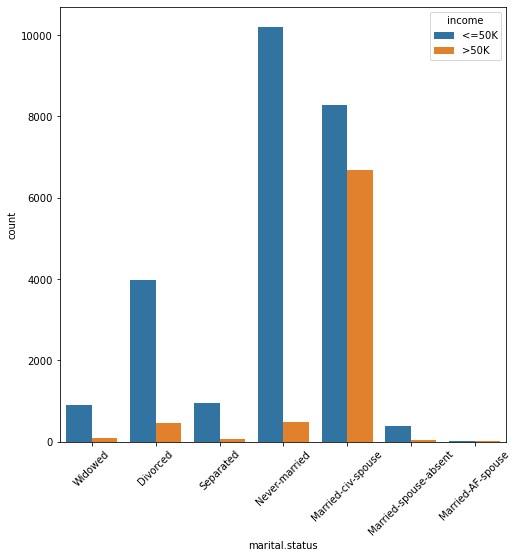

In [118]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['marital.status'], hue=data['income'])
plt.xticks(rotation=45);

LOOKS LIKE THE NEVER-MARRIED(SINGLE) GROUP OF PEOPLE EARN LESS MONEY GENERALLY AND THE MARRIED-CIV-SPOUSE GROUP EARN RELATIVELY MORE MORE THAN ANY OTHER GROUP

In [119]:
#this dataset also reveals a '?' which needs to be changed
data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [120]:
data['occupation'][data['occupation']=='?']='undefined_occ'

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


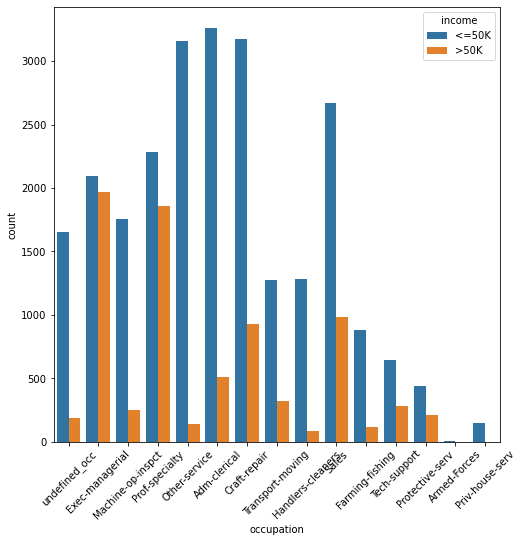

In [121]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['occupation'], hue=data['income'])
plt.xticks(rotation=45);

ITS VERY EVIDENT THAT PEOPLE IN THE TOP JOBS EARN MORE MONEY FOR EXAMPLE THE EXECUTIVE MANAGERS AND MACHINE OPERATORS INSPECTORS, 

In [122]:
data['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

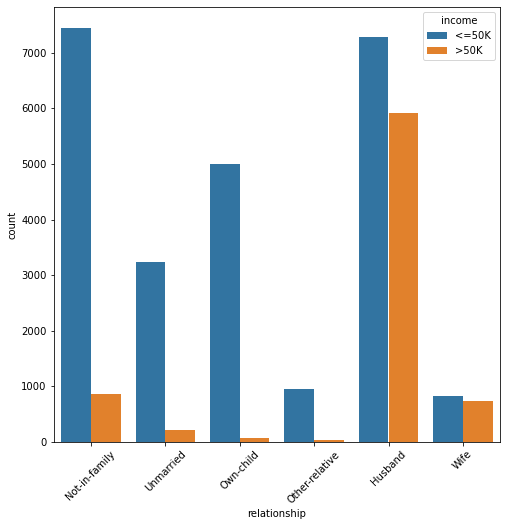

In [123]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['relationship'], hue=data['income'])
plt.xticks(rotation=45);

THIS ALSO SHOWS A VERUY OBVIOUS FEATURE THAT THE HUSBANDS(BREAD WINNERS) EARN SIGNIFICANTLY MORE MONEY THAN ANY OTHER GROUP

In [124]:
data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

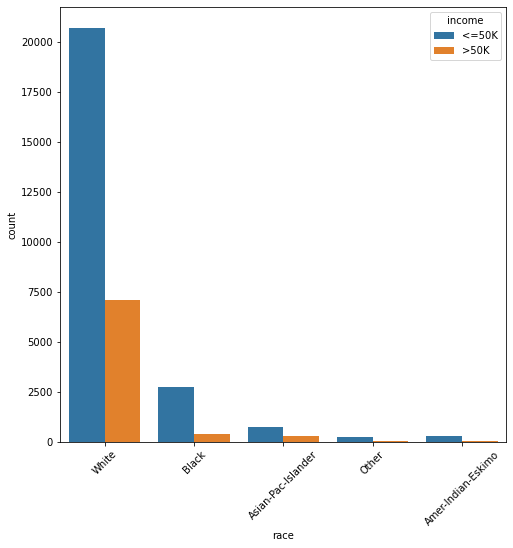

In [125]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['race'], hue=data['income'])
plt.xticks(rotation=45);

THIS DATASET DOESNT HAVE ANY RACE BIAS IN IT, THERE SEEMS TO BE A COMMON RELATION BETWEEN LOW AND HIGH INCOME EARNERS, SINCE THERE WERE 
MORE WHITE PEOPLE REGISTERED IN THIS DATASET, IT MAKES SENSE FOR THAT PARTICULAR RACE TO HAVE MORE PEOOLE IN THE HIGHER INCOME LEVELS

In [126]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

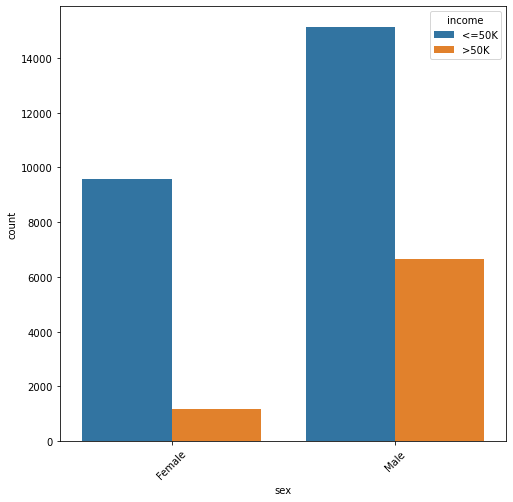

In [127]:
plt.figure(figsize=(8,8))
sns.countplot(x=data['sex'], hue=data['income'])
plt.xticks(rotation=45);

MALES TEND TO MAKE MORE MONEY AND ARE THE BREAD WINNERS IN MARRIGAES, SO ITS NATURAL HERE FOR THEM TO BELONG TO THE HIGHER INCOME GROUPS

In [128]:
data['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [129]:
data['native.country'][data['native.country']=='?']='undefined_country'

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


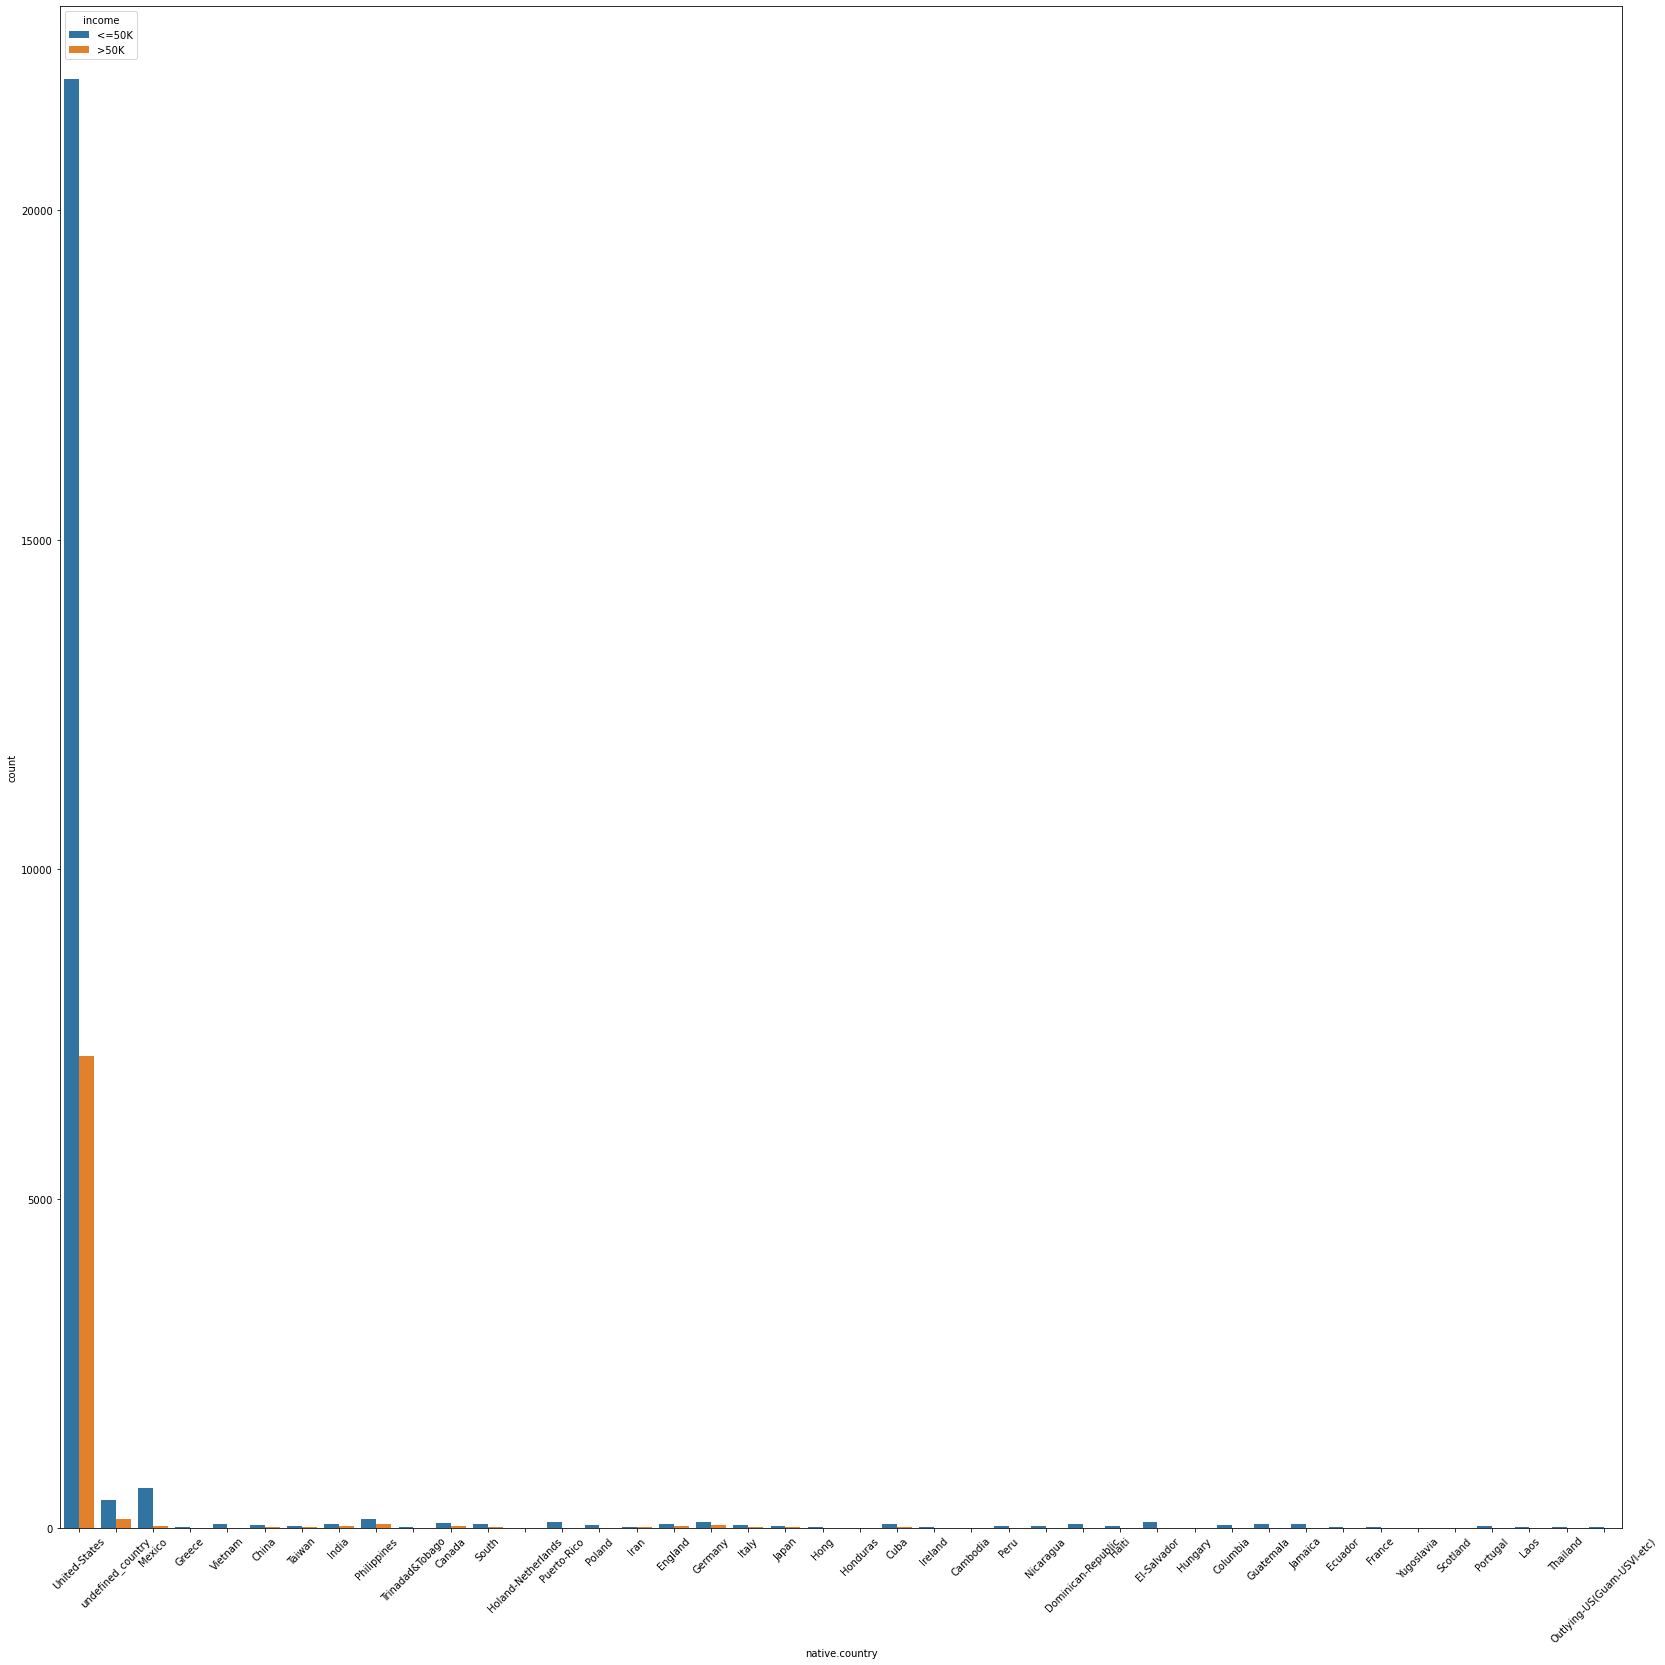

In [130]:
plt.figure(figsize=(28,28))
sns.countplot(x=data['native.country'], hue=data['income'])
plt.xticks(rotation=45);

THERE ARE A LOT OF COUNTRIES IN THSI FEATURE AND ITS CLEAR TO SEE MOST PEOPLE ARE FROM THE UNITED STATES HENCE THE HIGHER VALUES OF PEOPLE IN THE HIGHER INCOME GROUP

# ANALYZING THE NUMERICAL FEATURES

In [131]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [132]:
cols_to_check=['fnlwgt','capital.gain','capital.loss']

THE 'FNLWTG' NUMERICAL GROUP, THE DATA IS VERY SKEWED AND NEEDS TO BE FIXED

In [133]:
#log transform applied to correct the dataset
data['fnlwgt']=np.log(data['fnlwgt'])

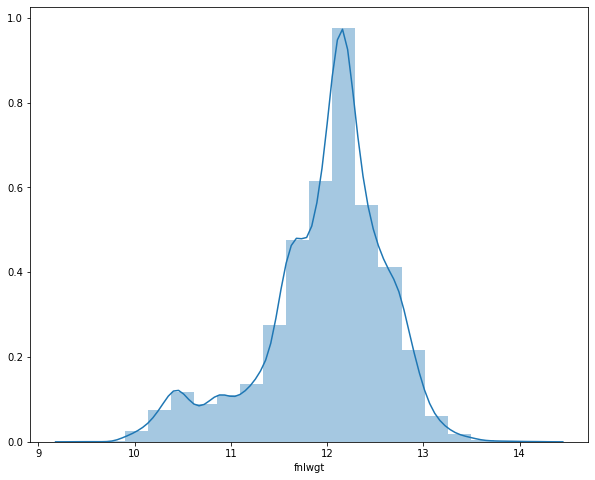

In [134]:
plt.figure(figsize=(10,8))
sns.distplot(data['fnlwgt'], bins=20)

ITS LOOKING MORE LIKE A GAUSSIAN NORMAL DISTRIBUTION CURVE

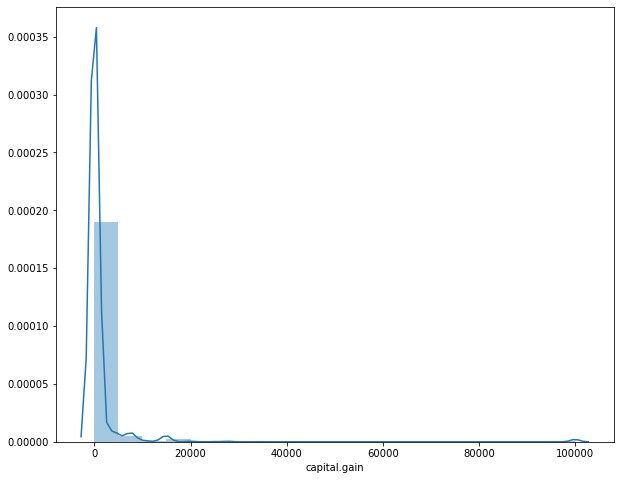

In [135]:
plt.figure(figsize=(10,8))
sns.distplot(data['capital.gain'], bins=20)

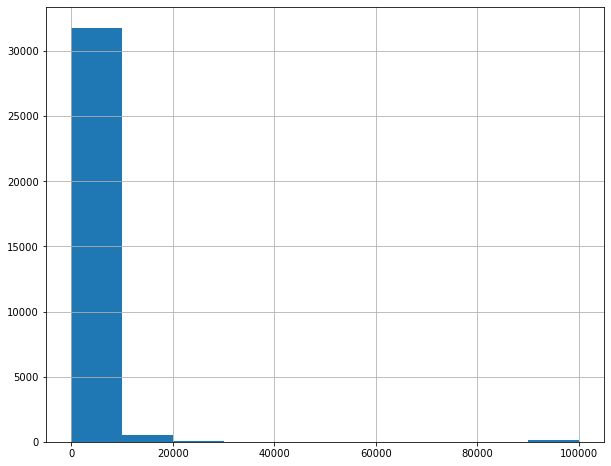

In [136]:
plt.figure(figsize=(10,8))
data['capital.gain'].hist()

TOO MANY OUTLIERS HERE AND NEED TO BE CORRECTED

In [137]:
#removing all the dataset that are greater than 10000
data[data['capital.gain']>10000]
data=data[data['capital.gain']<10000]

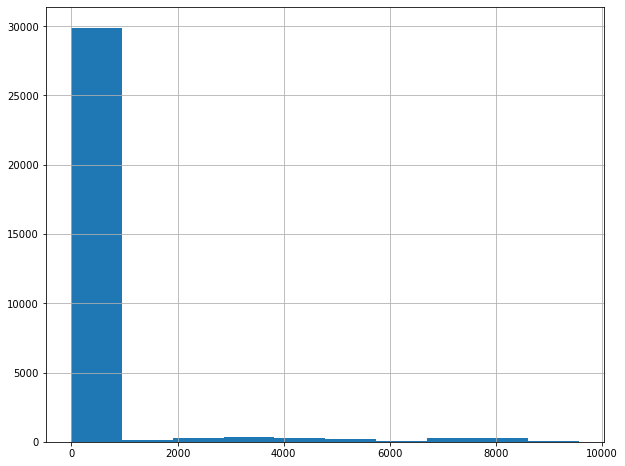

In [138]:
plt.figure(figsize=(10,8))
data['capital.gain'].hist()

MORE WORK CAN BE DONE HERE BUT IT LOOKS BETTER THAN BEFORE

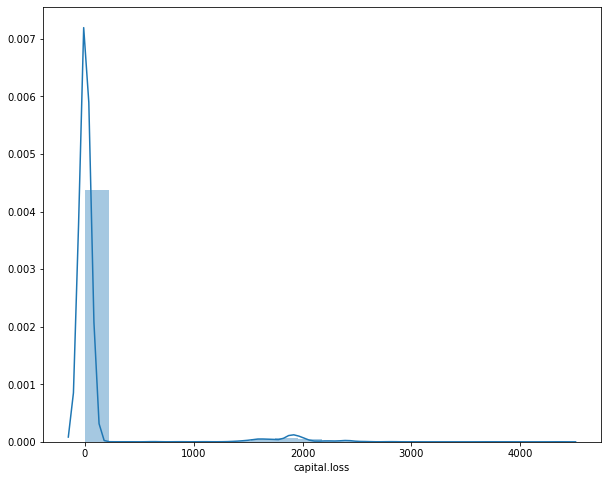

In [139]:
plt.figure(figsize=(10,8))
sns.distplot(data['capital.loss'], bins=20)

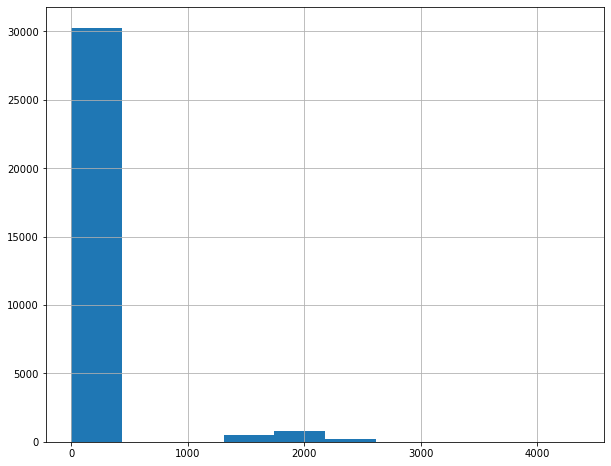

In [140]:
plt.figure(figsize=(10,8))
data['capital.loss'].hist()

OUTLIERS HERE SEEMS TO BE GROUPED AND NEED TO BE CORRECTED

In [141]:
#removing all the dataset that are greater than 2000
data[data['capital.loss']>2000]
data=data[data['capital.loss']<2000]

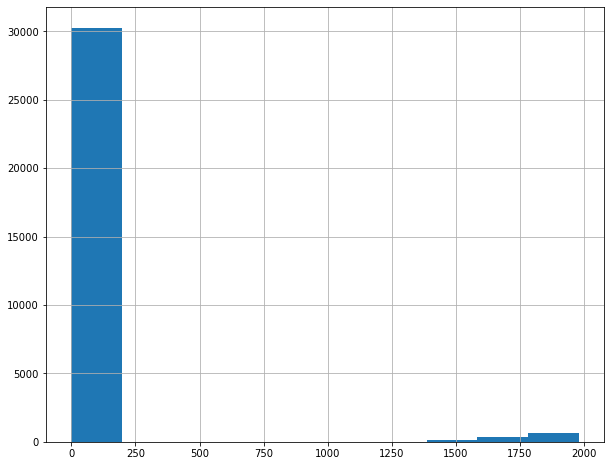

In [142]:
plt.figure(figsize=(10,8))
data['capital.loss'].hist()

ALSO LOOKS BETTER THAN BEFORE, WOULD LEAVE IT AT THAT

In [143]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
325,27,Private,11.735693,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,1980,40,United-States,<=50K
326,27,Private,11.664427,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,0,1980,40,Philippines,<=50K
327,35,Private,12.139500,Bachelors,13,Divorced,Sales,Not-in-family,White,Female,0,1980,65,United-States,<=50K
328,31,Self-emp-not-inc,11.993776,Bachelors,13,Married-spouse-absent,Exec-managerial,Not-in-family,White,Male,0,1980,60,United-States,<=50K
329,27,Federal-gov,13.059860,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,1980,40,United-States,<=50K


In [144]:
data.shape

(31466, 15)

In [145]:
#separating into features and labels
X=data.drop(columns='income')

In [146]:
#onehotencoding the features into a format that the model can understand
X=pd.get_dummies(X)
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_undefined_country
325,27,11.735693,9,0,1980,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
326,27,11.664427,10,0,1980,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
327,35,12.139500,13,0,1980,65,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
328,31,11.993776,13,0,1980,60,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
329,27,13.059860,9,0,1980,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,12.644818,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,27,12.458006,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32558,40,11.947134,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,58,11.931044,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [147]:
y=data['income']

In [148]:
#import neccesary library for dealing with the imbalanced dataset
from imblearn.over_sampling import RandomOverSampler

In [149]:
sampler=RandomOverSampler()
X_sample,y_sample=sampler.fit_sample(X,y)

NOW THE INCOME COLUMN HAS EQUAL AMOUNT OF DATA AND THE IMBALANCED PROBLEM HAS NOW BE TAKEN CARE OF

In [150]:
print(X_sample.shape)
print(y_sample.shape)

(49046, 107)
(49046,)


In [151]:
#importing all neccesary libraries for the inference
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [152]:
#setting test size to 20% of total dataset
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample, test_size=0.2, random_state=0)

In [153]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39236, 107)
(9810, 107)
(39236,)
(9810,)


In [154]:
#logisitc regression model
Lr=LogisticRegression(solver='liblinear')
Lr.fit(X_train,y_train)
Lr_pred_train=Lr.predict(X_train)
Lr_pred_test=Lr.predict(X_test)

In [155]:
#extreme gradient boosting with max depth of 3 and 80 estimators 
xg=XGBClassifier(max_depth=3,n_estimators=80)
xg.fit(X_train,y_train)
xg_pred_train=xg.predict(X_train)
xg_pred_test=xg.predict(X_test)

In [156]:
#K=8 using the nearest neighbour 
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knn_pred_train=knn.predict(X_train)
knn_pred_test=knn.predict(X_test)

In [157]:
print('The Training accuracy score for the Logistic Regression Model is ',accuracy_score(y_train,Lr_pred_train))
print('The Testing accuracy score for the Logistic Regression Model is ',accuracy_score(y_test,Lr_pred_test))
print('********************************************************************************************')
print('The Training accuracy score for the Xg Boost Model is ',accuracy_score(y_train,xg_pred_train))
print('The Testing accuracy score for the Xg Boost Model is ',accuracy_score(y_test,xg_pred_test))
print('********************************************************************************************')
print('The Training accuracy score for the KNN Model is ',accuracy_score(y_train,knn_pred_train))
print('The Testing accuracy score for the KNN Model is ',accuracy_score(y_test,knn_pred_test))

The Training accuracy score for the Logistic Regression Model is  0.8142777041492507
The Testing accuracy score for the Logistic Regression Model is  0.8154943934760448
********************************************************************************************
The Training accuracy score for the Xg Boost Model is  0.8328320929758385
The Testing accuracy score for the Xg Boost Model is  0.8349643221202854
********************************************************************************************
The Training accuracy score for the KNN Model is  0.8692782138852074
The Testing accuracy score for the KNN Model is  0.8405708460754332


IT CAN BE SEEN THAT THE XGBOOST MODEL SCORED THE HIGHEST ACCURACY WITH 83.3% CORRECTLY PREDICTED, BUT SOMETIMES THE ACCURACY ISNT THE BEST MEASURE TO BE USED

In [158]:
print('The Training f1 score for the Logistic Regression Model is ',f1_score(y_train,Lr_pred_train,pos_label='>50K'))
print('The Testing f1 score for the Logistic Regression Model is ',f1_score(y_test,Lr_pred_test,pos_label='>50K'))
print('********************************************************************************************')
print('The Training f1 score for the XgBoost Model is ',f1_score(y_train,xg_pred_train,pos_label='>50K'))
print('The Testing f1 score for the XgBoost Model is ',f1_score(y_test,xg_pred_test,pos_label='>50K'))
print('********************************************************************************************')
print('The Training f1 score for the KNN Model is ',f1_score(y_train,knn_pred_train,pos_label='>50K'))
print('The Testing f1 score for the KNN Model is ',f1_score(y_test,knn_pred_test,pos_label='>50K'))

The Training f1 score for the Logistic Regression Model is  0.8202471693924369
The Testing f1 score for the Logistic Regression Model is  0.8223051246809348
********************************************************************************************
The Training f1 score for the XgBoost Model is  0.8402231370733965
The Testing f1 score for the XgBoost Model is  0.8434992750120831
********************************************************************************************
The Training f1 score for the KNN Model is  0.8737849742845191
The Testing f1 score for the KNN Model is  0.8481258496795495


USING THE F1SCORE(A TRADE OFF BETWEEN PRECISION AND RECALL) THE XGBOOST SCORED HIGHER AGAIN AND IT DOESNT SHOW LEVELS OF OVERFITTING 

In [159]:
cm=confusion_matrix(y_test,xg_pred_test)
cm

array([[3828, 1041],
       [ 578, 4363]], dtype=int64)

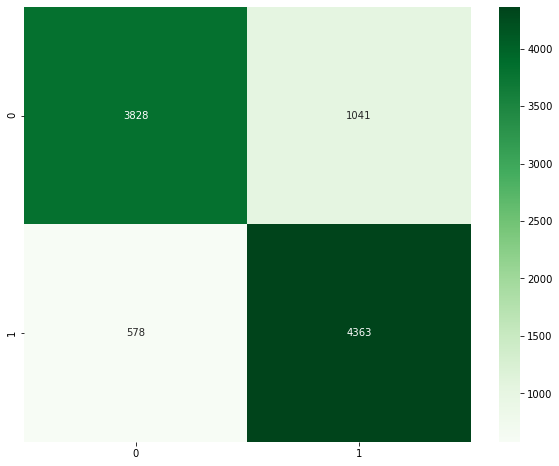

In [160]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True,fmt='.5g',cmap='Greens')

THE CONFUSION MATRIX ABOVE SHOWS THE NUMBER OF CORRECT PREDICTIONS USING THE XGBOOST MODEL AND ITS CLEAR TO SEE THAT THE TRUE POSITIVES AND TRUE NEGATIVES CONTAINED MORE VALUES WHICH SHOWS A HIGHER NUMBER OF PREDICTIONS WERE ACCURATE